### Линейная регрессия

#### Практические задания для самостоятельного выполнения

**Внимание**: некоторые задания базируются на результатах выполнения предыдущих заданий. Поэтому рекомендуется сохранять результаты выполнения всех заданий.

**Задание 1.**

1. Используя модуль _**datasets**_ библиотеки _**Scikit-learn**_, сгенерировать модельный набор данных для задачи линейной регрессии с одной целевой переменной и двумя признаками, из которых информативным является один. Параметр, определяющий степень рассеянности данных, установить равным 5.0, количество объектов положить равным 200. Обеспечить воспроизводимость результатов, задав значение соответствующему параметру.
* Using the _**datasets**_ module of the _**Scikit-learn**_ library, generate a model dataset for a linear regression problem with one target variable and two features, one of which is informative. Set the parameter that determines the degree of data dispersion to 5.0, set the number of objects to 200. Ensure reproducibility of the results by setting a value for the corresponding parameter.
<br><br>

2. Вывести на одном графике сгенерированный набор данных в координатах информативный признак – целевая переменная (использовать _**pylab.scatter**_) и прямую со сгенерированными коэффициентами.
* Display on one graph the generated data set in coordinates, an informative feature – the target variable (use _**pylab.scatter**_) and a straight line with the generated coefficients.
<br><br>

3. Поэкспериментировать с величиной шума: задать значения соответствующего параметра равными 7.0, 10.0 и 15.0, вывести графики (вместе с прямой регрессии) в одном ряду, с заголовками, сообщающими об используемом значении параметра шума.
* Experiment with the noise value: set the values of the corresponding parameter to 7.0, 10.0 and 15.0, display the graphs (together with the regression line) in one row, with headings reporting the value of the noise parameter used.
<br><br>

4. Выполнить разовое разбиение всех полученных наборов данных (с различными значениями шума) на обучающую и тестовую выборки в соотношении 70/30.
* Perform a one-time split of all received data sets (with different noise values) into training and test samples in the ratio of 70/30.
<br><br>

5. Для каждого набора данных создать модель линейной регрессии и обучить ее на обучающей выборке, используя метод градиентного спуска.
* For each dataset, create a linear regression model and train it on the training set using the gradient descent method.
<br><br>

6. Получить предсказания обученных моделей для объектов тестовых выборок. Вывести массивы ответов на тестовых выборках и массивы предсказанных моделью значений. Представить результаты в графической форме и проанализировать их.
* Obtain trained model predictions for test set objects. Output arrays of answers on test samples and arrays of values predicted by the model. Present the results in graphical form and analyze them.
<br><br>

7. Вывести коэффициенты уравнений, сформированных при генерации наборов данных, и коэффициенты регрессии, полученные после обучения моделей.
* Output the coefficients of the equations generated during the generation of data sets and the regression coefficients obtained after training the models.
<br><br>

8. Записать уравнение исходной зависимости (использованное в процессе генерации набора данных) и полученные уравнения регрессии. Внимание: не следует забывать про свободный член в уравнении регрессии!
* Write down the equation of the initial dependence (used in the process of generating the data set) and the resulting regression equations. Attention: do not forget about the free term in the regression equation!

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error
)
%matplotlib inline

---

1. Используя модуль _**datasets**_ библиотеки _**Scikit-learn**_, сгенерировать модельный набор данных для задачи линейной регрессии с одной целевой переменной и двумя признаками, из которых информативным является один. Параметр, определяющий степень рассеянности данных, установить равным 5.0, количество объектов положить равным 200. Обеспечить воспроизводимость результатов, задав значение соответствующему параметру.
* Using the _**datasets**_ module of the _**Scikit-learn**_ library, generate a model dataset for a linear regression problem with one target variable and two features, one of which is informative. Set the parameter that determines the degree of data dispersion to 5.0, set the number of objects to 200. Ensure reproducibility of the results by setting a value for the corresponding parameter.

In [ ]:
X, y, coef = make_regression(n_samples=200, n_features=2, noise=5.0, coef=True, n_informative=1, random_state=125)

---

2. Вывести на одном графике сгенерированный набор данных в координатах информативный признак – целевая переменная (использовать _**pylab.scatter**_) и прямую со сгенерированными коэффициентами.
* Display on one graph the generated data set in coordinates, an informative feature – the target variable (use _**pylab.scatter**_) and a straight line with the generated coefficients.

In [ ]:
# вспомогательная функция для этого и следующего пунктов (чтобы не дублировать код)
def visualize_regression(X, y, coef, title):
    # информативный признак
    most_inf = X[:, np.argmax(coef)]

    # генерим x и y для построения графика коэффициента
    space_coef_x = np.linspace(np.min(most_inf), np.max(most_inf), 100)
    space_coef_y = space_coef_x * np.max(coef)

    # строим графики
    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot()
    # строим график поточечно
    ax.scatter(most_inf, y, label="информативный признак", color='orange')
    # строим график линией
    ax.plot(space_coef_x, space_coef_y, label="коэффициент", color='green')
    plt.title(title)
    plt.legend()
    plt.show()

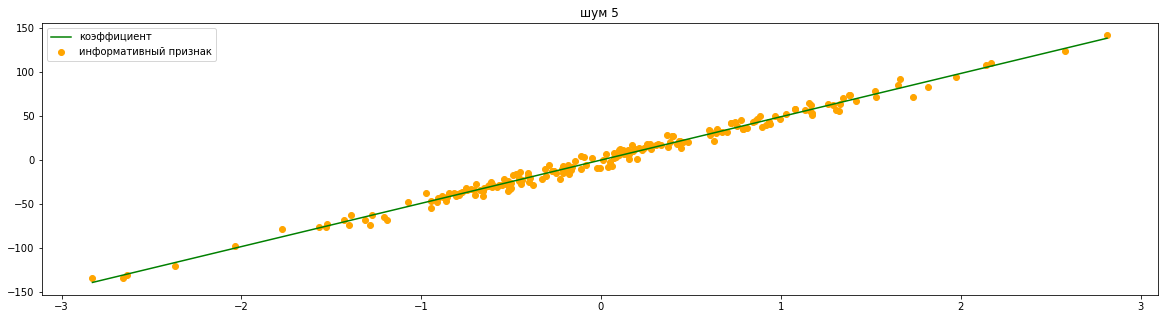

In [ ]:
# визуализируем регрессию
visualize_regression(X=X, y=y, coef=coef, title= "шум 5")

---

3. Поэкспериментировать с величиной шума: задать значения соответствующего параметра равными 7.0, 10.0 и 15.0, вывести графики (вместе с прямой регрессии) в одном ряду, с заголовками, сообщающими об используемом значении параметра шума.
* Experiment with the noise value: set the values of the corresponding parameter to 7.0, 10.0 and 15.0, display the graphs (together with the regression line) in one row, with headings reporting the value of the noise parameter used.

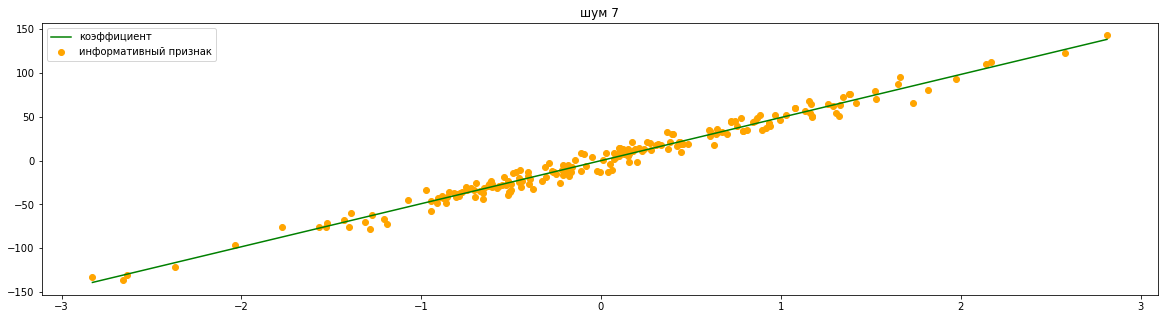

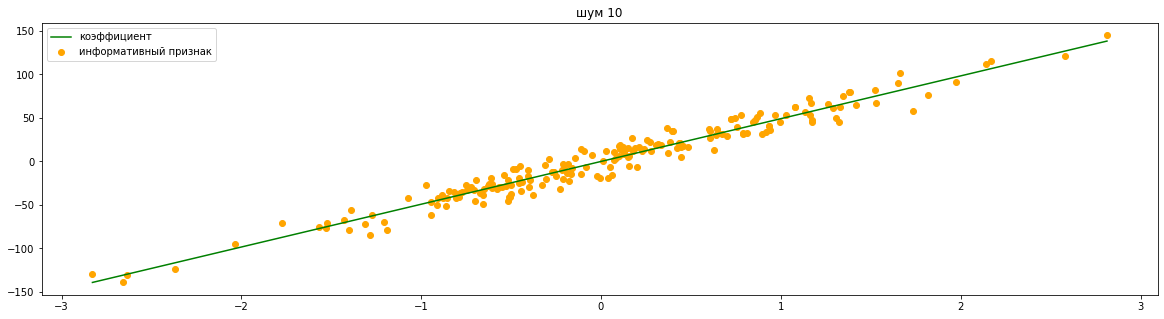

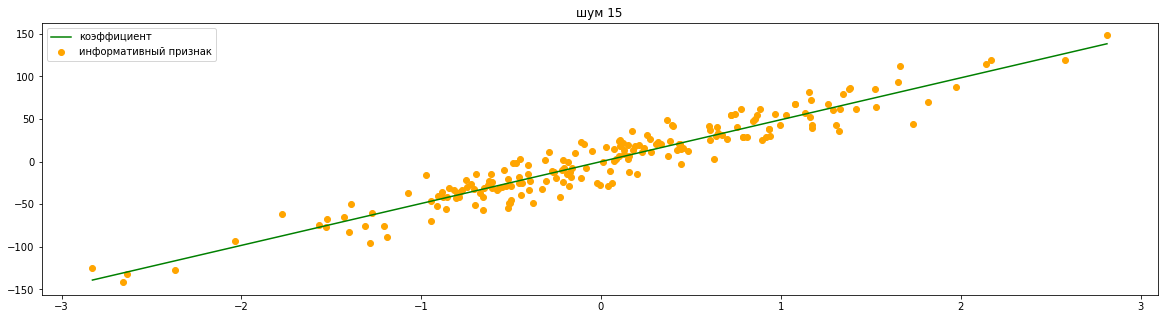

In [ ]:
# словарь с датасетами
datasets = {}
datasets[5] = (X, y, coef)

# проходим циклом через заданные варианты шумов
for noise in [7, 10, 15]:
    # генерим датасет
    X, y, coef = make_regression(n_samples=200, n_features=2, noise=noise, coef=True, n_informative=1, random_state=125)
    # визуализируем регрессию
    visualize_regression(X=X, y=y, coef=coef, title= "шум %s" % noise)
    # закидываем в словарь
    datasets[noise] = (X, y, coef)

---

4. Выполнить разовое разбиение всех полученных наборов данных (с различными значениями шума) на обучающую и тестовую выборки в соотношении 70/30.
* Perform a one-time split of all received data sets (with different noise values) into training and test samples in the ratio of 70/30.

In [ ]:
# словарь с разделенными датасетами
splitted_datasets = {}
for noise, (X, y, coef) in datasets.items():
    # разделяем датасет на тестовую и тренировочные части
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    # закидываем в словарь
    splitted_datasets[noise] = (X_train, X_test, y_train, y_test, coef)

---

5. Для каждого набора данных создать модель линейной регрессии и обучить ее на обучающей выборке, используя метод градиентного спуска.
* For each dataset, create a linear regression model and train it on the training set using the gradient descent method.

In [ ]:
# словарь с моделями
models = {}
for noise, (X_train, X_test, y_train, y_test, coef) in splitted_datasets.items():
    # создаем модель
    model = LinearRegression()
    # тренируем модель
    model.fit(X_train, y_train)
    # закидываем в словарь
    models[noise] = model

---

6. Получить предсказания обученных моделей для объектов тестовых выборок. Вывести массивы ответов на тестовых выборках и массивы предсказанных моделью значений. Представить результаты в графической форме и проанализировать их.
* Obtain trained model predictions for test set objects. Output arrays of answers on test samples and arrays of values predicted by the model. Present the results in graphical form and analyze them.

Регрессия на выборке с шумом 5.


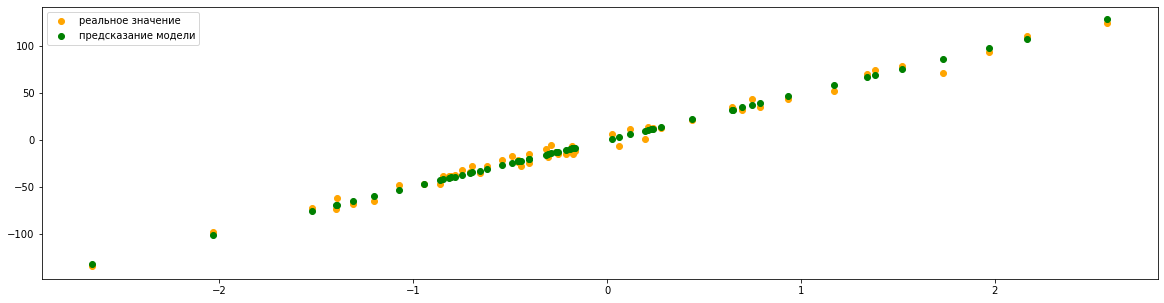

Регрессия на выборке с шумом 7.


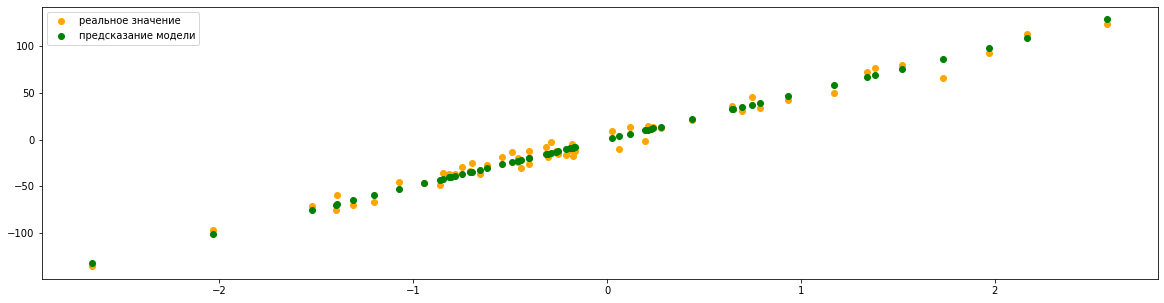

Регрессия на выборке с шумом 10.


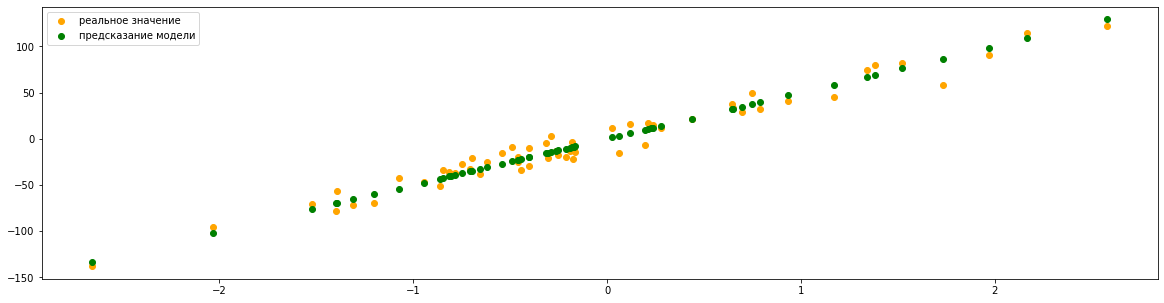

Регрессия на выборке с шумом 15.


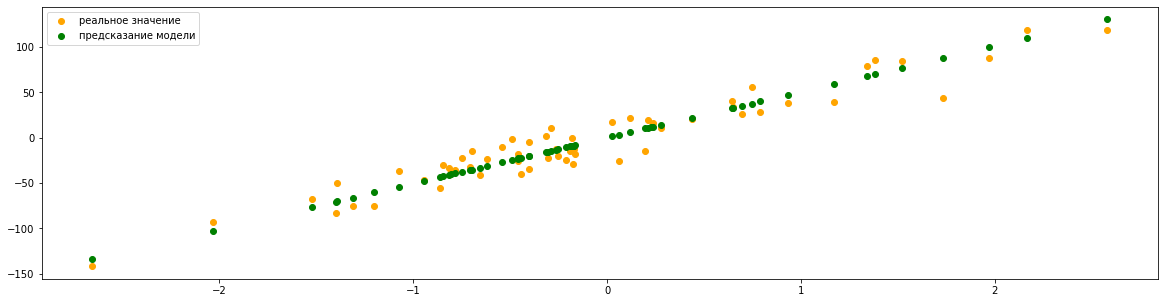

In [ ]:
for noise, (X_train, X_test, y_train, y_test, coef) in splitted_datasets.items():
    model = models[noise]
    # получаем предсказания модели
    y_predict = model.predict(X_test)
    print("Регрессия на выборке с шумом %s." % noise)
    # print(*[round(y, 2) for y in y_predict])
    # print(*[round(y, 2) for y in y_test])

    most_inf = X_test[:, np.argmax(coef)]

    # строим графики
    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot()
    ax.scatter(most_inf, y_test, label="реальное значение", color='orange')
    ax.scatter(most_inf, y_predict, label="предсказание модели", color='green')
    plt.legend()
    plt.show()

Видно, что чем больше шум в тестовых данных, тем больше отклонение предсказанй регрессии.

---

7. Вывести коэффициенты уравнений, сформированных при генерации наборов данных, и коэффициенты регрессии, полученные после обучения моделей.
* Output the coefficients of the equations generated during the generation of data sets and the regression coefficients obtained after training the models.

In [ ]:
for noise, (X_train, X_test, y_train, y_test, coef) in splitted_datasets.items():
    print("Выборка с шумом %s." % noise)
    print("Коэффициенты при генерации: ", *[round(с, 3) for с in coef])
    print("Коэффициенты регрессии: ", *[round(с, 3) for с in models[noise].coef_])
    print("Свободный член: ", round(models[noise].intercept_, 3))
    print()

Выборка с шумом 5.
Коэффициенты при генерации:  0.0 49.173
Коэффициенты регрессии:  -0.046 49.62
Свободный член:  0.087

Выборка с шумом 7.
Коэффициенты при генерации:  0.0 49.173
Коэффициенты регрессии:  -0.065 49.799
Свободный член:  0.122

Выборка с шумом 10.
Коэффициенты при генерации:  0.0 49.173
Коэффициенты регрессии:  -0.093 50.067
Свободный член:  0.174

Выборка с шумом 15.
Коэффициенты при генерации:  0.0 49.173
Коэффициенты регрессии:  -0.139 50.514
Свободный член:  0.261



---

8. Записать уравнение исходной зависимости (использованное в процессе генерации набора данных) и полученные уравнения регрессии. Внимание: не следует забывать про свободный член в уравнении регрессии!
* Write down the equation of the initial dependence (used in the process of generating the data set) and the resulting regression equations. Attention: do not forget about the free term in the regression equation!

>**Выборка с шумом 5.**<br>
>Уравнение исходной зависимости: $49.173 x_2 = y$<br>
>Коэффициенты регрессии: $-0.046 x_1 + 49.62 x_2 + 0.087 = y$
>
>**Выборка с шумом 7.**<br>
>Уравнение исходной зависимости: $49.173 x_2 = y$<br>
>Коэффициенты регрессии: $-0.065 x_1 + 49.799 x_2 + 0.122 = y$
>
>**Выборка с шумом 10.**<br>
>Уравнение исходной зависимости: $49.173 x_2 = y$<br>
>Коэффициенты регрессии: $-0.093 x_1 + 50.067 x_2 + 0.174 = y$
>
>**Выборка с шумом 15.**<br>
>Уравнение исходной зависимости: $49.173 x_2 = y$<br>
>Коэффициенты регрессии: $-0.139 x_1 + 50.514 x_2 + 0.261 = y$

---

**Задание 2.**

_**Часть 1.**_

1. Имеются данные о росте и весе 25 тыс. подростков в дюймах и фунтах соответственно ([источник](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)). Данные содержатся в файле _**HeightsWeights.csv**_ (выдается преподавателем), либо можно скачать данные из источника. Импортировать эти данные в DataFrame и вывести несколько первых записей (для контроля корректности импорта и получения представления о наборе данных).
* There are data on the height and weight of 25 thousand teenagers in inches and pounds, respectively ([source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)). The data is contained in the _**HeightsWeights.csv**_ file (provided by your instructor), or you can download the data from a source. Import this data into a DataFrame and display the first few records (to control the correctness of the import and get an idea about the data set).
<br><br>

2. Выполнить первичный анализ данных: построить гистограммы распределения признаков (с заголовками) и проанализировать характер их распределения, наличие/отсутствие выбросов.
* Perform primary data analysis: build histograms of feature distribution (with headings) and analyze the nature of their distribution, the presence/absence of outliers.
<br><br>

3. Добавить в DataFrame новый признак – индекс массы тела (BMI). Формулу для его вычисления можно, получить, например, [здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D1%81%D1%8B_%D1%82%D0%B5%D0%BB%D0%B0) (не забыть перевести фунты в килограммы, а дюймы в метры!). Указание: удобно использовать метод _**apply**_ в сочетании с лямбда-функцией Python. Вывести несколько первых записей и убедиться, что значения нового признака вычислены корректно.
* Add a new feature to the DataFrame – body mass index (BMI). The formula for calculating it can be obtained, for example, [here](https://en.wikipedia.org/wiki/Body_mass_index) (do not forget to convert pounds to kilograms, and inches to meters!). Hint: It is convenient to use the _**apply**_ method in combination with a Python lambda function. Display the first few records and make sure that the values of the new feature are calculated correctly.
<br><br>

4. Визуализировать попарные зависимости признаков (_m×m_ графиков, где _m_ – число признаков: по диагонали – гистограммы распределения признаков, вне диагонали – scatter-графики зависимостей двух признаков). Указание: использовать метод _**scatter_matrix**_ из модуля _**plotting**_ библиотеки _**Pandas**_. Проанализировать полученные графики: выяснить, есть ли пары признаков, для которых можно предполагать линейную зависимость.
* Visualize pairwise dependencies of features (_m×m_ plots, where _m_ is the number of features: diagonally – histograms of feature distribution, outside the diagonal – scatter plots of dependencies of two features). Hint: use the _**scatter_matrix**_ method from the _**plotting**_ module of _**Pandas**_. Analyze the resulting graphs: find out if there are pairs of features for which a linear relationship can be assumed.
<br><br>

5. Написать функцию, которая по двум параметрам $w_{0}$ и $w_{1}$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ линейной функцией $y = w_{0} + w_{1}∙x$
* Write a function that, given two parameters $w_{0}$ and $w_{1}$, calculates the squared error of the approximation of the dependence of height $y$ on weight $x$ by a linear function $y = w_{0} + w_{1}∙x$
<br><br>

6. Реализовать метод градиентного спуска для минимизации ошибки, обеспечив сохранение на каждой итерации текущего значения ошибки.
* Implement a gradient descent method to minimize the error by ensuring that the current value of the error is stored at each iteration.
<br><br>

7. Применить градиентный спуск к имеющемуся набору данных; вывести уравнение полученной линейной зависимости с оптимальными значениями коэффициентов.
* Apply gradient descent to the existing dataset; derive the equation of the obtained linear dependence with the optimal values of the coefficients.
<br><br>

8. Вывести на одном графике исходный набор данных в координатах вес – рост (использовать _**pylab.scatter**_) и прямую с оптимальными значениями коэффициентов.
* Display on one chart the original data set in coordinates weight - height (use _**pylab.scatter**_) and a straight line with optimal values of the coefficients.
<br><br>

9. Вывести график, показывающий изменение значения ошибки алгоритма в зависимости от числа итераций.
* Plot a graph showing how the algorithm's error value changes with the number of iterations.
<br><br>

_**Часть 2.**_

10. Реализовать метод стохастического градиентного спуска для минимизации ошибки, обеспечив сохранение на каждой итерации текущего значения ошибки. Условие останова использовать то же, что и в п. 6.
* Implement a stochastic gradient descent method to minimize the error by ensuring that the current value of the error is stored at each iteration. Stop condition use the same as in step 6.
<br><br>

11. Применить стохастический градиентный спуск к имеющемуся набору данных; вывести уравнение полученной линейной зависимости с оптимальными значениями коэффициентов.
* Apply stochastic gradient descent to the given dataset; derive the equation of the obtained linear dependence with the optimal values of the coefficients.
<br><br>

12. Вывести на одном графике исходный набор данных в координатах вес – рост (использовать _**pylab.scatter**_) и прямую с оптимальными значениями коэффициентов, полученных с помощью стохастического градиентного спуска.
* Display on one graph the original dataset in the coordinates weight - height (use _**pylab.scatter**_) and a straight line with optimal values of the coefficients obtained using stochastic gradient descent.
<br><br>

13. Вывести график, показывающий изменение значения ошибки алгоритма в зависимости от числа итераций. Сопоставить этот график с графиком, полученным в п. 9.
* Plot a graph showing how the algorithm's error value changes with the number of iterations. Compare this graph with the graph obtained in step 9.
<br><br>

14. Сравнить результаты работы алгоритмов Full GD и SGD по достигнутому значению функции ошибки, числу итераций и затраченному времени (для вывода затраченного времени использовать в коде команду %%time – перед вызовом метода).
* Compare the results of the Full GD and SGD algorithms in terms of the achieved value of the error function, the number of iterations, and the elapsed time (to display the elapsed time, use the %%time command in the code before calling the method).
<br><br>

15. Сделать выводы.
* Make conclusions.
<br><br>

_**Часть 3.**_

16. Используя инструментарий библиотеки _**Scikit-learn**_, выполнить разовое разбиение данных исходного набора (значения веса и роста) на обучающую и тестовую выборки в соотношении 70/30. Значения веса рассматривать в качестве признака, значения роста – в качестве целевой переменной.
* Using the toolkit of the _**Scikit-learn**_ library, perform a one-time split of the original set data (weight and height values) into training and test samples in the ratio of 70/30. Consider weight values as a feature, height values as a target variable.
<br><br>

17. На обучающей выборке обучить две модели линейной регрессии: используя метод градиентного спуска и метод стохастического градиентного спуска.
* On the training sample, train two linear regression models: using the gradient descent method and the stochastic gradient descent method.
<br><br>

18. Получить предсказания обученных моделей для объектов тестовой выборки. Вывести массивы ответов на тестовой выборке и массив предсказанных моделью значений. Представить результаты в графической форме.
* Obtain trained model predictions for test set objects. Output arrays of responses on the test sample and an array of values predicted by the model. Present results in graphical form.
<br><br>

19. Записать полученные уравнения регрессии. Сравнить их с уравнениями, полученными при выполнении части 1 и части 2 данного задания.
* Write down the obtained regression equations. Compare them with the equations obtained in part 1 and part 2 of this assignment.
<br><br>

20. Сделать выводы.
* Make conclusions.

---

1. Имеются данные о росте и весе 25 тыс. подростков в дюймах и фунтах соответственно ([источник](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)). Данные содержатся в файле _**HeightsWeights.csv**_ (выдается преподавателем), либо можно скачать данные из источника. Импортировать эти данные в DataFrame и вывести несколько первых записей (для контроля корректности импорта и получения представления о наборе данных).
* There are data on the height and weight of 25 thousand teenagers in inches and pounds, respectively ([source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)). The data is contained in the _**HeightsWeights.csv**_ file (provided by your instructor), or you can download the data from a source. Import this data into a DataFrame and display the first few records (to control the correctness of the import and get an idea about the data set).

In [ ]:
df = pd.read_csv('HeightsWeights.csv')
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


**поле `Index` можно удалить так как dataframe и так индексирован**

In [ ]:
df.drop(columns=["Index"], inplace=True)
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


---

2. Выполнить первичный анализ данных: построить гистограммы распределения признаков (с заголовками) и проанализировать характер их распределения, наличие/отсутствие выбросов.
* Perform primary data analysis: build histograms of feature distribution (with headings) and analyze the nature of their distribution, the presence/absence of outliers.

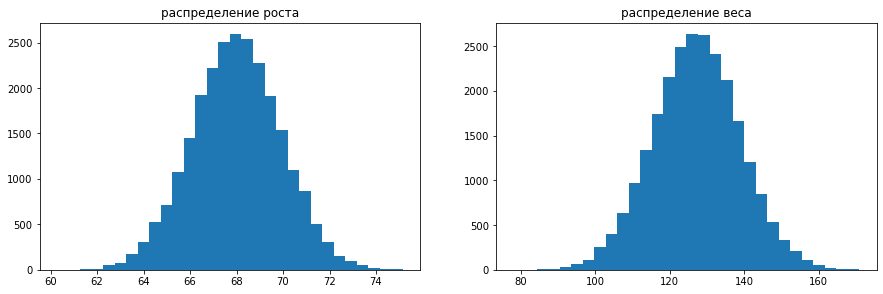

In [ ]:
# строим графики
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df["Height"].values, bins=30)
plt.title("распределение роста")

plt.subplot(2, 2, 2)
plt.hist(df["Weight"].values, bins=30)
plt.title("распределение веса")

plt.show()

* распределение веса и роста соответствует нормальному распределению (логично с теоретической точки зрения). выбросов не наблюдается
* the distribution of each of weight and height appeared to be a normal distribution (logical from a theoretical point of view). with no outliers observed

---

3. Добавить в DataFrame новый признак – индекс массы тела (BMI). Формулу для его вычисления можно, получить, например, [здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D1%81%D1%8B_%D1%82%D0%B5%D0%BB%D0%B0) (не забыть перевести фунты в килограммы, а дюймы в метры!). Указание: удобно использовать метод _**apply**_ в сочетании с лямбда-функцией Python. Вывести несколько первых записей и убедиться, что значения нового признака вычислены корректно.
* Add a new feature to the DataFrame – body mass index (BMI). The formula for calculating it can be obtained, for example, [here](https://en.wikipedia.org/wiki/Body_mass_index) (do not forget to convert pounds to kilograms, and inches to meters!). Hint: It is convenient to use the _**apply**_ method in combination with a Python lambda function. Display the first few records and make sure that the values of the new feature are calculated correctly.

In [ ]:
# подсчет BMI с переводом мер веса и длины
def bmi(row):
    # умножьте на 0,4536 чтобы перевести в килограммы
    # умножьте на 0,0254 чтобы перевести в метры
    return row['Weight'] * 0.4536 / (row['Height'] * 0.0254)**2

df['BMI'] = df.apply(lambda x: bmi(x), axis=1)
df.head()

,Height,Weight,BMI
0,65.78331,112.9925,18.357933
1,71.51521,136.4873,18.762946
2,69.39874,153.0269,22.339334
3,68.21660,142.3354,21.504948
4,67.78781,144.2971,22.078014


---

4. Визуализировать попарные зависимости признаков (_m×m_ графиков, где _m_ – число признаков: по диагонали – гистограммы распределения признаков, вне диагонали – scatter-графики зависимостей двух признаков). Указание: использовать метод _**scatter_matrix**_ из модуля _**plotting**_ библиотеки _**Pandas**_. Проанализировать полученные графики: выяснить, есть ли пары признаков, для которых можно предполагать линейную зависимость.
* Visualize pairwise dependencies of features (_m×m_ plots, where _m_ is the number of features: diagonally – histograms of feature distribution, outside the diagonal – scatter plots of dependencies of two features). Hint: use the _**scatter_matrix**_ method from the _**plotting**_ module of _**Pandas**_. Analyze the resulting graphs: find out if there are pairs of features for which a linear relationship can be assumed.

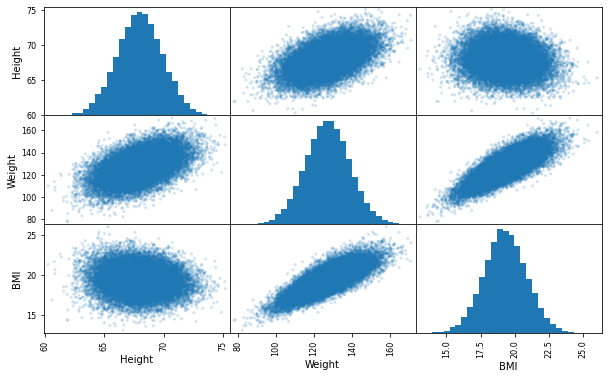

In [ ]:
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10, 6), hist_kwds={'bins' : 30});

* Значение индекса массы тела соответствует нормальному распределению. По графикам видно, что есть линейная зависимость между ИМТ и весом (облако точек явно вытянуто по диагонали), так же видна небольшая зависимость между весом и ростом.
* The value of the body mass index corresponds to a normal distribution. The graphs show that there is a linear relationship between BMI and weight (the cloud of points is clearly elongated diagonally), a slight relationship between weight and height is also visible.

---

5. Написать функцию, которая по двум параметрам $w_{0}$ и $w_{1}$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ линейной функцией $y = w_{0} + w_{1}∙x$
* Write a function that, given two parameters $w_{0}$ and $w_{1}$, calculates the squared error of the approximation of the dependence of height $y$ on weight $x$ by a linear function $y = w_{0} + w_{1}∙x$

In [ ]:
# для удобства сохраняем вес и рост как отдельные массивы
X = np.array(df['Weight'].values)
y = np.array(df['Height'].values)

In [ ]:
# определяем линейную функцию
def ms_error(X, y, w0, w1):
    return np.sum(np.square(y - (w0 + w1 * X))) / y.size

---

6. Реализовать метод градиентного спуска для минимизации ошибки, обеспечив сохранение на каждой итерации текущего значения ошибки.
* Implement a gradient descent method to minimize the error by ensuring that the current value of the error is stored at each iteration.

In [ ]:
def gradient_descent(X, y, lr=0.05, epoch=10):
    # начальные значения параметров
    w0 = 50
    w1 = 0.5
    mse = [] # список, куда сохраняем ошибку на каждом шаге
    for _ in range(epoch):
        f = y - (w1 * X + w0)
    
        # сдвигаемся по w0 на шаг в сторону уменьшения градиента ошибки
        w0 -= lr * (-2 * f.sum() / y.size)
        # сдвигаемся по w1 на шаг в сторону уменьшения градиента ошибки
        w1 -= lr * (-2 * X.dot(f).sum() / y.size)
        
        mse.append(ms_error(X, y, w0, w1))   
    
    return w0, w1, mse

---

7. Применить градиентный спуск к имеющемуся набору данных; вывести уравнение полученной линейной зависимости с оптимальными значениями коэффициентов.
* Apply gradient descent to the existing dataset; derive the equation of the obtained linear dependence with the optimal values of the coefficients.

In [ ]:
# применяем реализованный метод
%time
w_0, w_1, mse = gradient_descent(X, y, lr=0.00001, epoch=20)

Wall time: 0 ns


In [ ]:
print("Текущие значения ошибки для каждого шага:\n\n", mse)

Текущие значения ошибки для каждого шага:

 [956.9313552470272, 436.8032153362588, 200.32711880496427, 92.8133352495922, 43.93222703105964, 21.70844635128699, 11.604411315497297, 7.010614853370633, 4.922046638650117, 3.9724796645654936, 3.5407592489784188, 3.344477609558134, 3.255238136226104, 3.2146653502911904, 3.1962188585893148, 3.187832079653439, 3.1840189459863537, 3.1822852187130146, 3.1814968929075023, 3.1811383935842446]


In [ ]:
print("Полученные значения параметров: w0 = %s, w1 = %s" % (w_0, w_1))

Полученные значения параметров: w0 = 49.997225821889984, w1 = 0.14124915717688602


Уравнение линейной зависимости:

$y = 0.1412 * x + 49.9972$

---

8. Вывести на одном графике исходный набор данных в координатах вес – рост (использовать _**pylab.scatter**_) и прямую с оптимальными значениями коэффициентов.
* Display on one chart the original data set in coordinates weight - height (use _**pylab.scatter**_) and a straight line with optimal values of the coefficients.

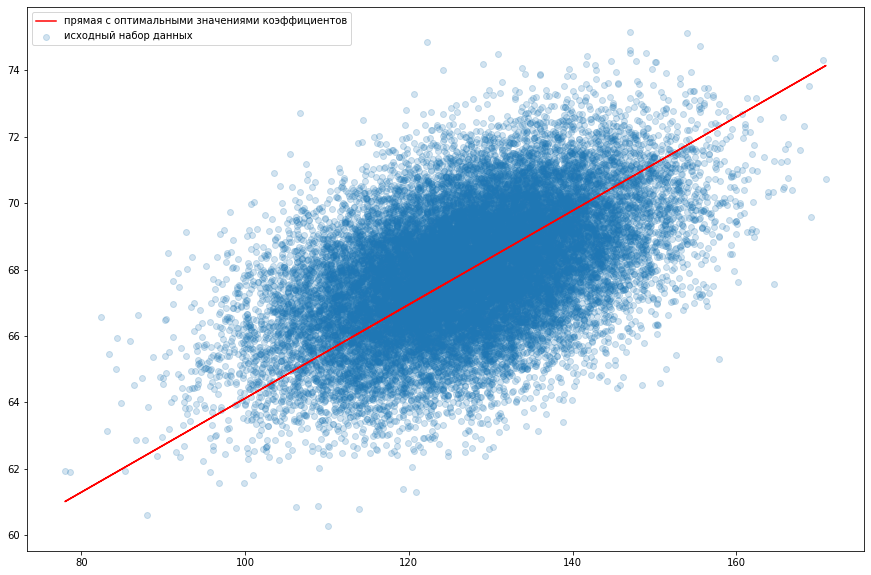

In [ ]:
plt.figure(figsize=(15, 10))

plt.scatter(X, y, alpha=0.2, label="исходный набор данных")
plt.plot(X, (w_0 + w_1 * X), color="r", label="прямая с оптимальными значениями коэффициентов")

plt.legend()
plt.show()

---

9. Вывести график, показывающий изменение значения ошибки алгоритма в зависимости от числа итераций.
* Plot a graph showing how the algorithm's error value changes with the number of iterations.

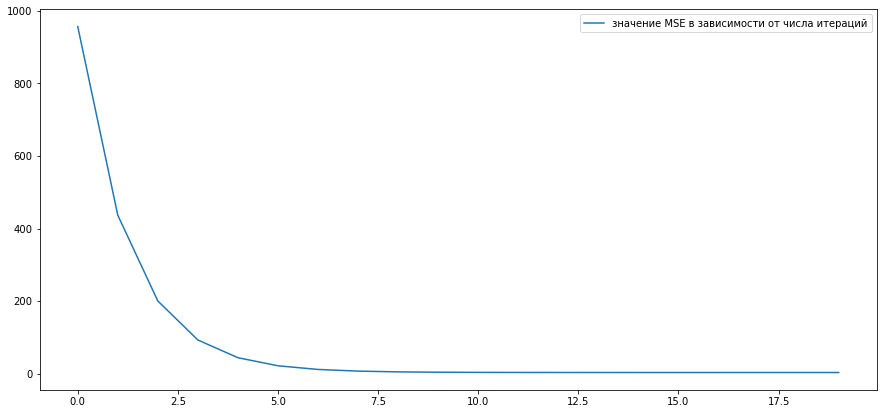

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(mse, label="значение MSE в зависимости от числа итераций")
plt.legend()
plt.show()

---

10. Реализовать метод стохастического градиентного спуска для минимизации ошибки, обеспечив сохранение на каждой итерации текущего значения ошибки. Условие останова использовать то же, что и в п. 6.
* Implement a stochastic gradient descent method to minimize the error by ensuring that the current value of the error is stored at each iteration. Stop condition use the same as in step 6.

In [ ]:
def stohastic_gradient_descent(X, y, lr=0.05, epoch=10, batch_size=10):
    # начальные значения параметров
    w0 = 50
    w1 = 0.5
    mse = [] # список, куда сохраняем ошибку на каждом шаге
    for _ in range(epoch):
        # генерируем случайные индекси размера batch_size
        indexes = np.random.randint(0, len(X), batch_size)

        # берем семплы по этим индексам
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)

        f = ys - (w1 * Xs + w0)
    
        # сдвигаемся по w0 на шаг в сторону уменьшения градиента ошибки
        w0 -= lr * (-2 * f.sum() / ys.size)
        # сдвигаемся по w1 на шаг в сторону уменьшения градиента ошибки
        w1 -= lr * (-2 * Xs.dot(f).sum() / ys.size)
        
        mse.append(ms_error(Xs, ys, w0, w1))   
    
    return w0, w1, mse

---

11. Применить стохастический градиентный спуск к имеющемуся набору данных; вывести уравнение полученной линейной зависимости с оптимальными значениями коэффициентов.
* Apply stochastic gradient descent to the given dataset; derive the equation of the obtained linear dependence with the optimal values of the coefficients.

In [ ]:
# применяем реализованный метод
%time
w_0s, w_1s, mses = stohastic_gradient_descent(X, y, lr=0.00001, epoch=20, batch_size=10)

Wall time: 0 ns


In [ ]:
# каждый раз коэффициенты немного разные, как как выбираются рандомные значения из X и y
print("Полученные значения параметров: w0 = %s, w1 = %s" % (w_0s, w_1s))

Полученные значения параметров: w0 = 49.997254335236065, w1 = 0.14237774728800964


Уравнение полученной линейной зависимости:

$y \approx 49.997 + 0.14 \times x$

---

12. Вывести на одном графике исходный набор данных в координатах вес – рост (использовать _**pylab.scatter**_) и прямую с оптимальными значениями коэффициентов, полученных с помощью стохастического градиентного спуска.
* Display on one graph the original dataset in the coordinates weight - height (use _**pylab.scatter**_) and a straight line with optimal values of the coefficients obtained using stochastic gradient descent.

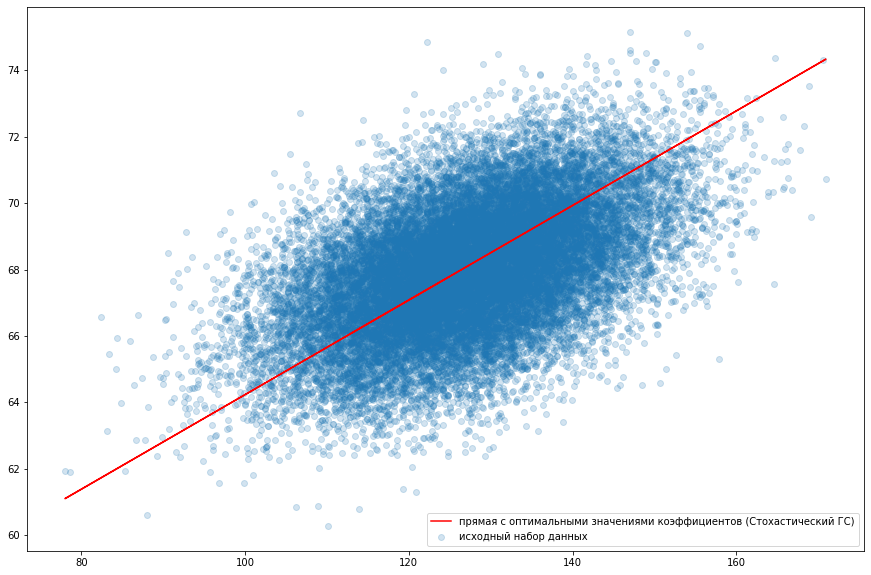

In [ ]:
plt.figure(figsize=(15, 10))

plt.scatter(X, y, alpha=0.2, label="исходный набор данных")
plt.plot(X, (w_0s + w_1s * X), color="r", label="прямая с оптимальными значениями коэффициентов (Стохастический ГС)")

plt.legend()
plt.show()

---

13. Вывести график, показывающий изменение значения ошибки алгоритма в зависимости от числа итераций. Сопоставить этот график с графиком, полученным в п. 9.
* Plot a graph showing how the algorithm's error value changes with the number of iterations. Compare this graph with the graph obtained in step 9.

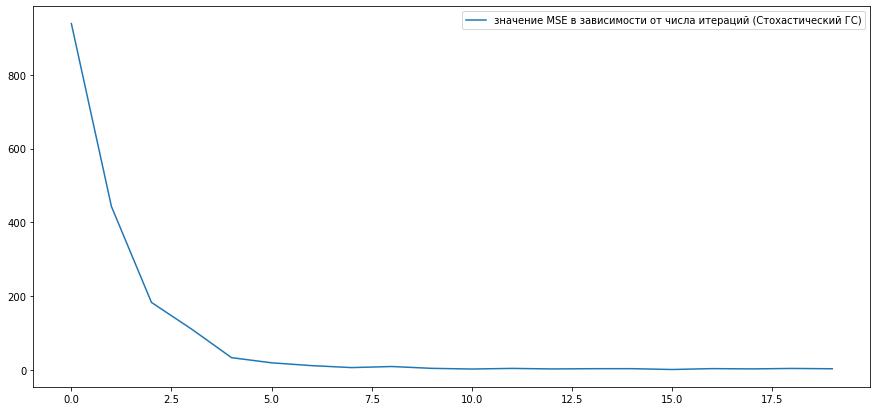

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(mses, label="значение MSE в зависимости от числа итераций (Стохастический ГС)")
plt.legend()
plt.show()

---

14. Сравнить результаты работы алгоритмов Full GD и SGD по достигнутому значению функции ошибки, числу итераций и затраченному времени (для вывода затраченного времени использовать в коде команду %%time – перед вызовом метода).
* Compare the results of the Full GD and SGD algorithms in terms of the achieved value of the error function, the number of iterations, and the elapsed time (to display the elapsed time, use the %%time command in the code before calling the method).

**Для сравнения скорости работы запустим реализованные методы с большим количеством итераций:**

In [ ]:
%%time
# простой градиентный спуск
_ = gradient_descent(X, y, lr=0.00001, epoch=2000)

Wall time: 384 ms


In [ ]:
%%time
# стохастический градиентный спуск
_ = stohastic_gradient_descent(X, y, lr=0.00001, epoch=2000, batch_size=10)

Wall time: 157 ms


* Значения достигнутой ошибки примерно одинаковы, число итераций тоже. А вот времени на стохастический спуск тратится гораздо меньше (примерно в 3 раза)
* The values of the achieved error are approximately the same, the number of iterations is the same. But the time spent on stochastic descent is much less (about 3 times)

---

15. Сделать выводы.
* Make conclusions.

* Стохастический градиентный спуск заменяет реальный градиент, вычисленный из полного набора данных, оценкой, вычисленной из случайно выбранного подмножества данных. Это сокращает задействованные вычислительные ресурсы и помогает достичь более высокой скорости итераций в обмен на более низкую скорость сходимости. Особенно будет полезен стохастический градиентный спуск на больших наборах данных.
* Stochastic gradient descent replaces the actual gradient computed from the full dataset with an estimate computed from a randomly selected subset of the data. This reduces the computational resources involved and helps achieve higher iteration rates in exchange for lower convergence rates. Stochastic gradient descent will be especially useful on large datasets.

---

16. Используя инструментарий библиотеки _**Scikit-learn**_, выполнить разовое разбиение данных исходного набора (значения веса и роста) на обучающую и тестовую выборки в соотношении 70/30. Значения веса рассматривать в качестве признака, значения роста – в качестве целевой переменной.
* Using the toolkit of the _**Scikit-learn**_ library, perform a one-time split of the original set data (weight and height values) into training and test samples in the ratio of 70/30. Consider weight values as a feature, height values as a target variable.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---

17. На обучающей выборке обучить две модели линейной регрессии: используя метод градиентного спуска и метод стохастического градиентного спуска.
* On the training sample, train two linear regression models: using the gradient descent method and the stochastic gradient descent method.

In [ ]:
# написал класс, чтобы в дальнейшем было удобнее работать с регрессией
# сделал его подобным моделям из ScikitLearn
class LinearRegressionCustom:
    def __init__(self, stohastic=False, lr=0.00001, epoch=20, batch_size=10):
        self.stohastic = stohastic
        self.lr = lr
        self.epoch = epoch
        self.batch_size = batch_size


    def fit(self, X, y):
        if (self.stohastic):
            self.w0, self.w1, self.mse = gradient_descent(X, y, self.lr, self.epoch)
        else:
            self.w0, self.w1, self.mse_s = stohastic_gradient_descent(X, y, self.lr,  self.epoch,  self.batch_size)

    def predict(self, X):
        try:
            return self.w0 + self.w1 * X
        except AttributeError:
            print("Error: сначала обучите модель!")

In [ ]:
# инициализируем модель с обычным ГС
model = LinearRegressionCustom(stohastic=False, lr=0.00001, epoch=20)

# инициализируем модель с стохастическим ГС
model_s = LinearRegressionCustom(stohastic=True, lr=0.00001, epoch=20, batch_size=10)

# тренируем модели
model.fit(X_train, y_train)
model_s.fit(X_train, y_train)

---

18. Получить предсказания обученных моделей для объектов тестовой выборки. Вывести массивы ответов на тестовой выборке и массив предсказанных моделью значений. Представить результаты в графической форме.
* Obtain trained model predictions for test set objects. Output arrays of responses on the test sample and an array of values predicted by the model. Present results in graphical form.

In [ ]:
# получаем предсказания
y_pred = model.predict(X_test)
y_pred_s = model_s.predict(X_test)

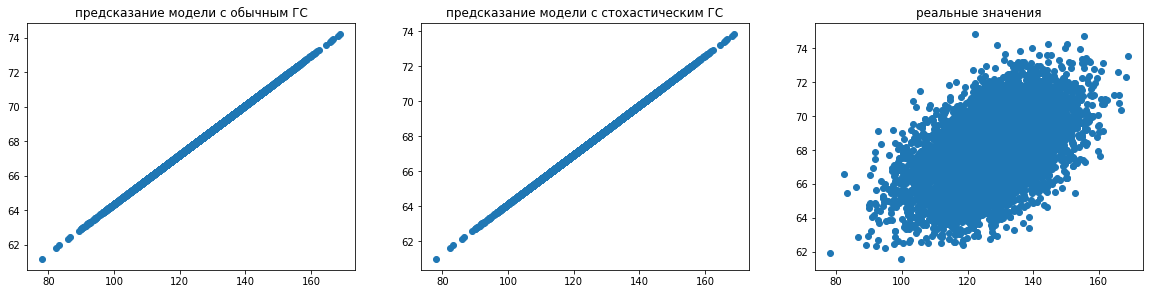

In [ ]:
# строим графики
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.scatter(X_test, y_pred)
plt.title("предсказание модели с обычным ГС")

plt.subplot(2, 3, 2)
plt.scatter(X_test, y_pred_s)
plt.title("предсказание модели с стохастическим ГС")

plt.subplot(2, 3, 3)
plt.scatter(X_test, y_test)
plt.title("реальные значения")

plt.show()

---

19. Записать полученные уравнения регрессии. Сравнить их с уравнениями, полученными при выполнении части 1 и части 2 данного задания.
* Write down the obtained regression equations. Compare them with the equations obtained in part 1 and part 2 of this assignment.

In [ ]:
print("Параметры модели с обычным ГС: w0 = %s, w1 = %s" % (model.w0, model.w1))
print("Параметры модели с стохастическим ГС: w0 = %s, w1 = %s" % (model_s.w0, model_s.w1))

Параметры модели с обычным ГС: w0 = 49.99720359769758, w1 = 0.143405517911671
Параметры модели с стохастическим ГС: w0 = 49.997225842228396, w1 = 0.14128925282843632


Уравнение модели с обычным ГС:

$y \approx 49.997 + 0.141 \times x$

Уравнение модели c стохастическим ГС:

$y \approx 49.997 + 0.141 \times x$

Как видно, значения коэффициентов одинаковы у всех моделей.

---

20. Сделать выводы.
* Make conclusions.

* Единственный вывод, чоторый тут можно еще сдела, это то, что релизованный метод имеет высокую устойчивость, на разных выборках из исходного датасета достигается идентичный результат.
* The only conclusion that can still be made here is that the implemented method has high stability, an identical result is achieved on different samples from the original dataset.

---

**Задание 3.**

1. Сгенерировать модельный набор данных для задачи линейной регрессии с одной целевой переменной и четырьмя признаками, из которых информативными являются два. Параметр, определяющий степень рассеянности данных, установить равным 5.0. Обеспечить воспроизводимость результатов, задав значение соответствующему параметру.
* Generate a model dataset for a linear regression problem with one target variable and four features, two of which are informative. Set the parameter that determines the degree of data scatter to 5.0. Ensure reproducible results by setting the appropriate parameter.
<br><br>

2. Выполнить разбиение полученного набора данных на обучающую и тестовую выборки в соотношении 70/30.
* Split the resulting data set into training and test samples in the ratio of 70/30.
<br><br>

3. Построить модели линейной регрессии, использующие $L_{2}$ и $L_{1}$ регуляризаторы. Обучить эти модели на обучающей выборке, используя следующие значения коэффициента регуляризации: 0.001, 0.01, 0.2, 1, 2, 10.
* Build linear regression models using $L_{2}$ and $L_{1}$ regularizers. Train these models on the training set using the following values of the regularization coefficient: 0.001, 0.01, 0.2, 1, 2, 10.
<br><br>

4. Для каждой обученной модели получить предсказания на объектах тестовой выборки.
* For each trained model, get predictions on the objects of the test set.
<br><br>

5. Вывести коэффициенты уравнений регрессии, полученные после обучения каждой модели. Записать соответствующие уравнения регрессии.
* Output the coefficients of the regression equations obtained after training each model. Write down the corresponding regression equations.
<br><br>

6. Выполнить анализ полученных уравнений: проследить, какое влияние на получаемые результаты оказывает тип регуляризатора, значение коэффициента регуляризации.
* Perform an analysis of the obtained equations: trace the influence on the results obtained by the type of regularizer, the value of the regularization coefficient.
<br><br>

7. Создать отчет по результатам выполнения задания: постановка задачи, описание каждой модели (используемый регуляризатор, используемое значение коэффициента регуляризации, полученные результаты, общие выводы по результатам анализа п. 6).
* Create a report on the results of the task: problem statement, description of each model (the regularizer used, the value of the regularization coefficient used, the results obtained, general conclusions based on the results of the analysis, step 6).

---

1. Сгенерировать модельный набор данных для задачи линейной регрессии с одной целевой переменной и четырьмя признаками, из которых информативными являются два. Параметр, определяющий степень рассеянности данных, установить равным 5.0. Обеспечить воспроизводимость результатов, задав значение соответствующему параметру.
* Generate a model dataset for a linear regression problem with one target variable and four features, two of which are informative. Set the parameter that determines the degree of data scatter to 5.0. Ensure reproducible results by setting the appropriate parameter.

In [ ]:
X, y, coef = make_regression(n_samples=200, n_features=4, noise=5.0, coef=True, n_informative=2, random_state=125)

---

2. Выполнить разбиение полученного набора данных на обучающую и тестовую выборки в соотношении 70/30.
* Split the resulting data set into training and test samples in the ratio of 70/30.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

---

3. Построить модели линейной регрессии, использующие $L_{2}$ и $L_{1}$ регуляризаторы. Обучить эти модели на обучающей выборке, используя следующие значения коэффициента регуляризации: 0.001, 0.01, 0.2, 1, 2, 10.
* Build linear regression models using $L_{2}$ and $L_{1}$ regularizers. Train these models on the training set using the following values of the regularization coefficient: 0.001, 0.01, 0.2, 1, 2, 10.

In [ ]:
# Lasso использует L1 регуляризацию 
from sklearn.linear_model import Lasso
# Ridge использует L2 регуляризацию 
from sklearn.linear_model import Ridge

# словари с тренированными моделями
models_l = {}
models_r = {}

for coef in [0.001, 0.01, 0.2, 1, 2, 10]:
    model_l = Lasso(alpha=coef)
    model_r = Ridge(alpha=coef)

    model_l.fit(X_train, y_train)
    model_r.fit(X_train, y_train)

    models_l[coef] = model_l
    models_r[coef] = model_r

---

4. Для каждой обученной модели получить предсказания на объектах тестовой выборки.
* For each trained model, get predictions on the objects of the test set.

In [ ]:
# словари с предсказаниями моделей
y_preds_l = {}
y_preds_r = {}

for coef in models_l.keys():
    model_l = models_l[coef]
    model_r = models_r[coef]

    y_preds_l[coef] = model_l.predict(X_test)
    y_preds_r[coef] = model_r.predict(X_test)

---

5. Вывести коэффициенты уравнений регрессии, полученные после обучения каждой модели. Записать соответствующие уравнения регрессии.
* Output the coefficients of the regression equations obtained after training each model. Write down the corresponding regression equations.

In [ ]:
for coef in models_l.keys():
    model_l = models_l[coef]

    print("Коэфф. Lasso регрессии (L₁ = %s): " % coef, model_l.coef_, "Свободный член: %s" % model_l.intercept_)

Коэфф. Lasso регрессии (L₁ = 0.001):  [45.60350679  2.00028649  0.50773146 -0.10570266] Свободный член: -0.19725929635517403
Коэфф. Lasso регрессии (L₁ = 0.01):  [45.59365943  1.99465492  0.49634047 -0.09673439] Свободный член: -0.19660095049181914
Коэфф. Lasso регрессии (L₁ = 0.2):  [45.38773953  1.86642652  0.25780584 -0.        ] Свободный член: -0.17011122311329485
Коэфф. Lasso регрессии (L₁ = 1):  [44.57640895  1.20465187  0.         -0.        ] Свободный член: -0.045403036441285405
Коэфф. Lasso регрессии (L₁ = 2):  [43.58289465  0.3420702   0.         -0.        ] Свободный член: 0.0920461113928126
Коэфф. Lasso регрессии (L₁ = 10):  [35.41359105  0.          0.         -0.        ] Свободный член: 0.7927101331813335


In [ ]:
for coef in models_r.keys():
    model_r = models_r[coef]

    print("Коэфф. Ridge регрессии (L₂ = %s): " % coef, model_r.coef_, "Свободный член: %s" % model_r.intercept_)

Коэфф. Ridge регрессии (L₂ = 0.001):  [45.60435185  2.00083667  0.50898623 -0.10670274] Свободный член: -0.19730581788946733
Коэфф. Ridge регрессии (L₂ = 0.01):  [45.60133643  2.00084577  0.50871559 -0.1066423 ] Свободный член: -0.19704788576385956
Коэфф. Ridge регрессии (L₂ = 0.2):  [45.53777129  2.00103255  0.50302035 -0.10537043] Свободный член: -0.19161062303377152
Коэфф. Ridge регрессии (L₂ = 1):  [45.27207772  2.00170825  0.47941765 -0.10010126] Свободный член: -0.16888261640896873
Коэфф. Ridge регрессии (L₂ = 2):  [44.94432549  2.00230902  0.4507504  -0.09370553] Свободный член: -0.140843754594
Коэфф. Ridge регрессии (L₂ = 10):  [42.48498292  1.99872374  0.25110103 -0.04930353] Свободный член: 0.06963115991452673


**Уравнения Lasso регрессий**


| $$Коэффициент L_1$$ | $$Уравнение$$ |
|---|---|
| $$0.001$$ | $$y = 45.604 x_1 + 2.0 x_2 + 0.508 x_3 - 0.106 x_4 - 0.197 $$|
| $$0.01$$ | $$y = 45.594 x_1 + 1.995 x_2 + 0.496 x_3 - 0.097 x_4 - 0.197 $$|
| $$0.2$$ | $$y = 45.388 x_1 + 1.866 x_2 + 0.258 x_3 - 0.17 $$|
| $$1$$ | $$y = 44.576 x_1 + 1.205 x_2 - 0.045 $$|
| $$2$$ | $$y = 43.583 x_1 + 0.342 x_2 + 0.092 $$|
| $$10$$ | $$y = 35.414 x_1 + 0.793 $$|


**Уравнения Ridge регрессий**


| $$Коэффициент L_2$$ | $$Уравнение$$ |
|---|---|
| $$0.001$$ | $$y = 45.604 x_1 + 2 x_2 + 0.509 x_3 - 0.107 x_4 - 0.197 $$|
| $$0.01$$ | $$y = 45.601 x_1 + 2 x_2 + 0.509 x_3 - 0.107 x_4 - 0.197 $$|
| $$0.2$$ | $$y = 45.538 x_1 + 2 x_2 + 0.503 x_3 - 0.105 x_4 - 0.192 $$|
| $$1$$ | $$y = 45.272 x_1 + 2.001 x_2 + 0.479 x_3 - 0.1 x_4 - 0.169 $$|
| $$2$$ | $$y = 44.944 x_1 + 2.002 x_2 + 0.451 x_3 - 0.094 x_4 - 0.141 $$|
| $$10$$ | $$y = 42.485 x_1 + 1.999 x_2 + 0.251 x_3 - 0.049 x_4 + 0.07 $$|

---

6. Выполнить анализ полученных уравнений: проследить, какое влияние на получаемые результаты оказывает тип регуляризатора, значение коэффициента регуляризации.
* Perform an analysis of the obtained equations: trace the influence on the results obtained by the type of regularizer, the value of the regularization coefficient.

* Lasso ($L_1$ регуляризация) регрессия при увеличении коэффициента снижает влияние малозначительных признаков на результат.
* Lasso ($L_1$ regularization) regression with increasing coefficient reduces the influence of insignificant features on the result.
<br><br><br>
* Ridge ($L_2$ регуляризация) регрессия уменьшает дисперсию, но становится смещенным, т.к. минимизируется также и норма вектора параметров, что заставляет решение сдвигаться в сторону нуля.
* Ridge ($L_2$ regularization) regression reduces the variance but becomes biased as the norm of the parameter vector is also minimized, which causes the solution to shift towards zero.

---

**Задание 4.**

1. Оценить качество моделей регрессии, полученных при выполнении части 3 задания 2. Для оценки использовать метрики _**MSE**_, _**MAE**_ и $R^{2}$. В целях более корректного сопоставления оценок _**MSE**_ и _**MAE**_ найти значение квадратного корня из _**MSE**_.
* Evaluate the quality of the regression models obtained during the execution of part 3 of assignment 2. Use the _**MSE**_, _**MAE**_ and $R^{2}$ metrics for evaluation. In order to more correctly compare the _**MSE**_ and _**MAE**_ estimates, find the square root of the _**MSE**_.
<br><br>

2. Дать интерпретацию полученным результатам.
* Give an interpretation of the results obtained.

In [ ]:
# продублируем код из второго задания, так как в 3 задании использовались те же имена переменных
df = pd.read_csv('HeightsWeights.csv')
df.drop(columns=["Index"], inplace=True)
# для удобства сохраняем вес и рост как отдельные массивы
X = np.array(df['Weight'].values)
y = np.array(df['Height'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# инициализируем модель с обычным ГС
model = LinearRegressionCustom(stohastic=False, lr=0.00001, epoch=20)
# инициализируем модель с стохастическим ГС
model_s = LinearRegressionCustom(stohastic=True, lr=0.00001, epoch=20, batch_size=10)

# тренируем модели
model.fit(X_train, y_train)
model_s.fit(X_train, y_train)

# делаем предсказания
y_pred = model.predict(X_test)
y_pred_s = model_s.predict(X_test)

In [ ]:
# считаем заданные метрики
mse = mean_squared_error(y_test, y_pred)
mse_s = mean_squared_error(y_test, y_pred_s)

mae = mean_absolute_error(y_test, y_pred)
mae_s = mean_absolute_error(y_test, y_pred_s)

r2 = r2_score(y_test, y_pred)
r2_s = r2_score(y_test, y_pred_s)

In [ ]:
print("Модель с обычным ГС:")
print("MSE = %s, RMSE = %s, MAE = %s, R² = %s" % (mse, np.sqrt(mse), mae, r2))
print("")
print("Модель с стохастическим ГС:")
print("MSE = %s, RMSE = %s, MAE = %s, R² = %s" % (mse_s, np.sqrt(mse_s), mae_s, r2_s))

Модель с обычным ГС:
MSE = 3.1922362678569014, RMSE = 1.7866830350839797, MAE = 1.4260212613796088, R² = 0.13289613095639075

Модель с стохастическим ГС:
MSE = 3.1893253381944717, RMSE = 1.78586823091584, MAE = 1.4245153975201634, R² = 0.13368682380022


Видно, что модель  со стохастическим ГС выдает чуть меньшие ошибки, что возможно случайность, в то же время у нее выше $R^2$

_R² (coefficient of determination) represents how well the values fit compared to the original values. <br>The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is._

---

**Задание 5.** (дополнительно).

Исходная постановка задачи представлена на kaggle: https://www.kaggle.com/c/bike-sharing-demand. Исходные данные: https://www.kaggle.com/c/bike-sharing-demand/data. Для анализа следует использовать данные из файла _**train.csv**_ (на указанном ресурсе). Требуется получить прогноз спроса (по часам) на велосипеды, выдаваемые в прокат. Необходимо учесть, что в наборе признаков присутствуют вещественные, категориальные, и бинарные данные, которые должны обрабатываться раздельно.

1. Импортировать данные в DataFrame и вывести несколько первых записей (для контроля корректности импорта и получения представления о наборе данных).
2. Выполнить проверку на присутствие в наборе пропущенных значений (при наличии пропусков их следует обработать).
3. Проанализировать, какая информация находится в столбцах _casual_, _registered_ и _count_ (последний – прогнозируемый признак). Объяснить, почему столбцы _casual_ и _registered_ не должны использоваться в качестве признаков в задаче построения прогноза общего спроса на велосипеды. Удалить эти столбцы из набора.
4. Вывести информацию обо всех полях полученного датафрейма. Обратить внимание на тип данных поля _datetime_. Преобразовать это поле к типу _datetime_ (для возможности дальнейшего применения различных преобразований даты).
5. Создать два новых поля, содержащих месяц и час (выделив их из соответствующей даты). <br>Пример: `data['month'] = data.datetime.apply(lambda x: x.month)` <br>Удалить столбец с датами (оставив для анализа два новых столбца).
6. Разделить исходный набор данных на обучающую и тестовую выборки таким образом, чтобы более ранние по времени данные использовались для обучения, а более поздние – для проверки качества модели. Для проверки использовать последние 1000 записей, остальные - для обучения. Выполнить проверку: вывести временные диапазоны для обучающей и тестовой выборки.
7. Выделить значения целевого признака в отдельный объект (и для обучающего, и для тестового набора). Удалить соответствующий столбец из обучающего и тестового наборов.
8. Организовать раздельную обработку бинарных, числовых и категориальных признаков:
    * бинарные признаки не нужно преобразовывать (только отделить);
    * числовые признаки – отделить и отмасштабировать (метод _**StandardScaler**_ из модуля _**preprocessing**_);
    * категориальные признаки – отделить и применить бинарное кодирование; 
    * после обработки столбцы собрать вместе, причем после сборки порядок столбцов должен сохраняться (для этого можно использовать трансформер _**FeatureUnion**_);
    * для преобразованного набора данных создать модель линейной регрессии. <br><u>Указание</u>: можно использовать метод _**Pipeline**_, который создает цепочку из нескольких шагов (в данном случае – двух шагов: обработки данных и построения модели регрессии) как единый объект, который можно обучать на обучающих данных.
9. Обучить модель линейной регрессии на обучающих данных. Оценить качество полученной модели на тестовых данных с помощью метрики _MAE_.
10. Для получения наглядного представления об адекватности модели выполнить визуализацию: вывести облако точек в координатах «истинные значения целевой функции» – «предсказанные моделью значения». Проанализировать полученные результаты, сделать выводы. <br><u>Указание</u>: ясно, что при хорошей предсказательной способности модели облако точек должно располагаться вдоль биссектрисы первого координатного угла (прогнозируемые моделью результаты близки к истинным значениям целевой функции).
11. Сделать выводы.